In [240]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')

In [241]:
data = pd.read_csv('C:/Users/405/Desktop/새 폴더 (2)/insurance.csv')

print(data)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [242]:
print(data.head())
print(data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


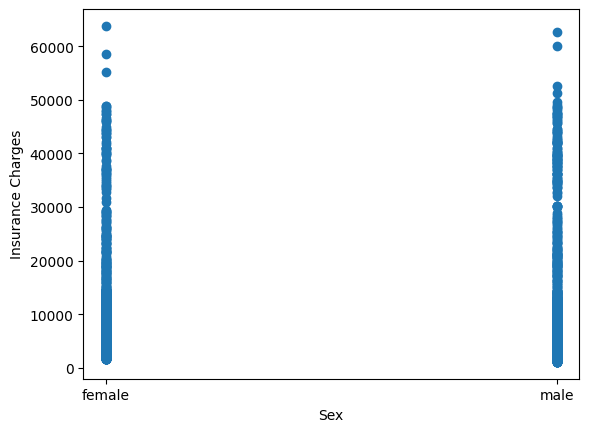

In [243]:
plt.scatter(data['sex'], data['charges'])
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

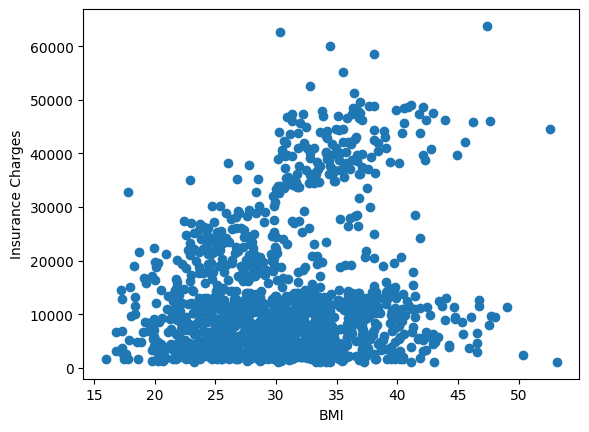

In [244]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

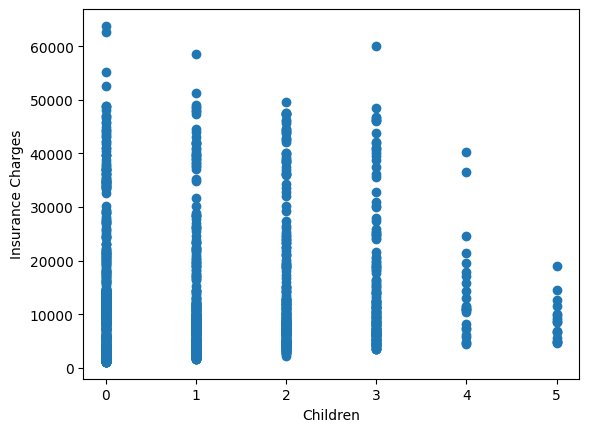

In [245]:
plt.scatter(data['children'], data['charges'])
plt.xlabel('Children')
plt.ylabel('Insurance Charges')
plt.show()

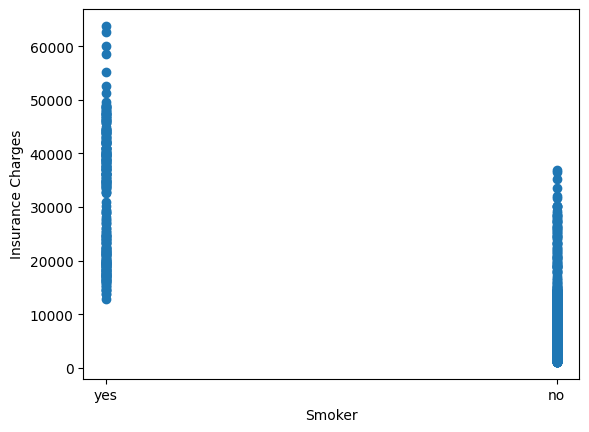

In [246]:
plt.scatter(data['smoker'], data['charges'])
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()


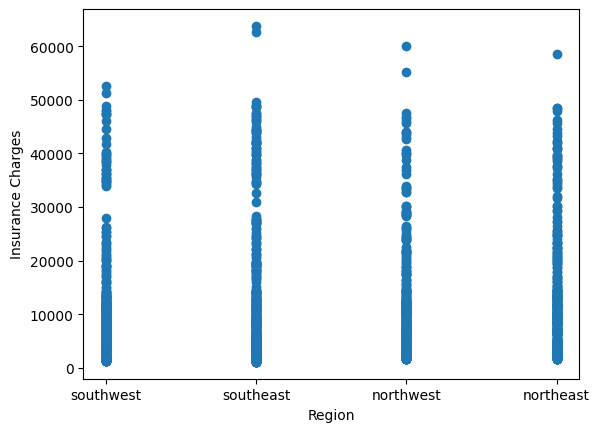

In [247]:
plt.scatter(data['region'], data['charges'])
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()

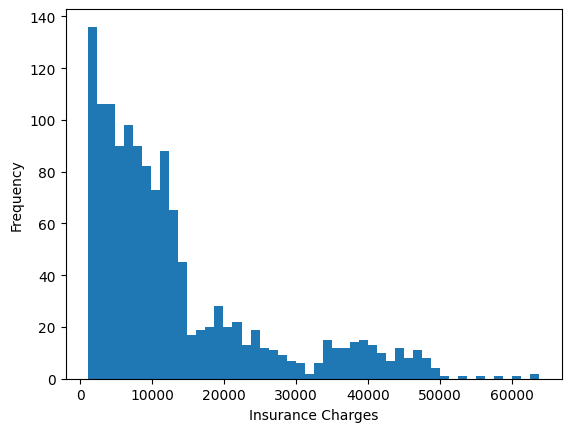

In [248]:
# 전체 보험료(charges) 분포
plt.hist(data['charges'], bins=50)
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()


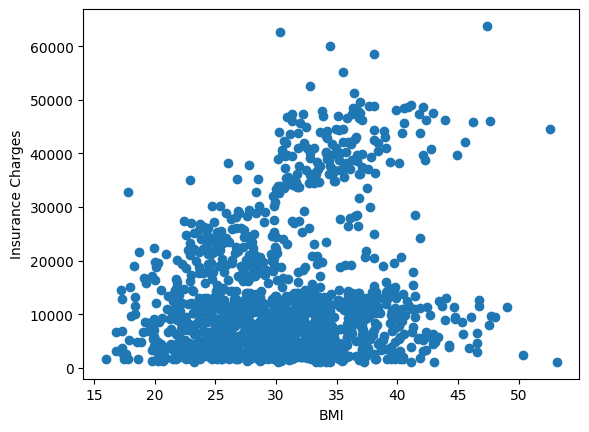

In [249]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

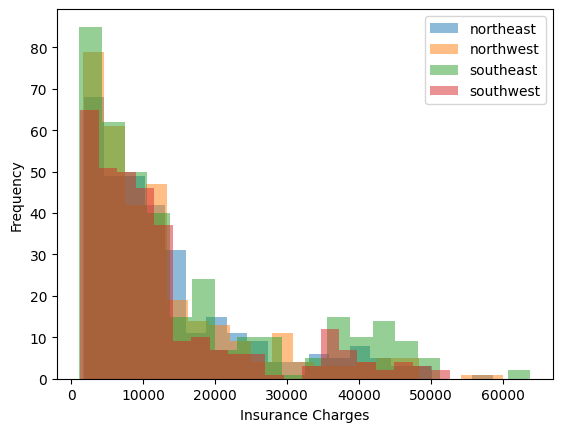

In [250]:
regions = ['northeast', 'northwest', 'southeast', 'southwest']
for region in regions:
    plt.hist(data[data['region'] == region]['charges'], alpha=0.5, label=region, bins=20)
plt.legend()
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()

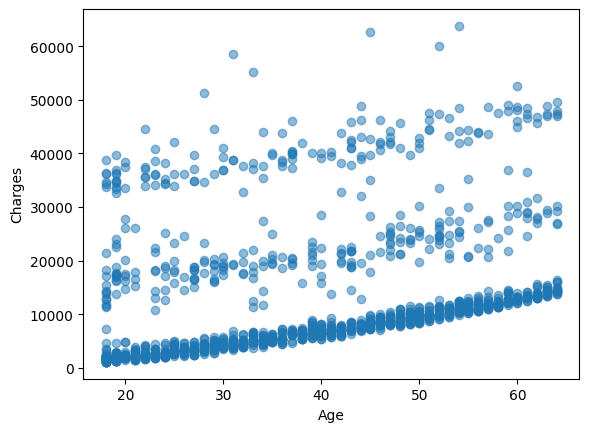

In [251]:
plt.scatter(data['age'], data['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

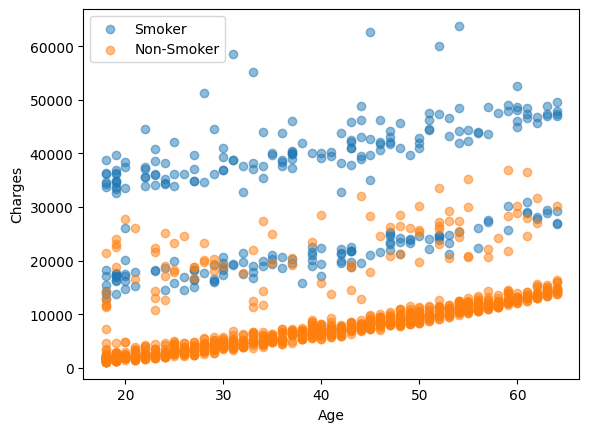

In [252]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['age'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['age'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

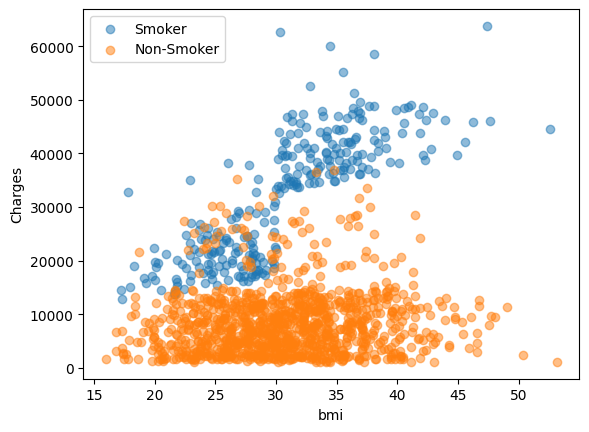

In [253]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['bmi'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['bmi'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

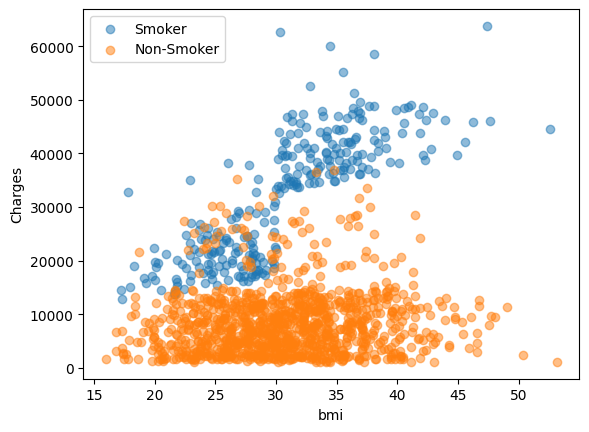

In [254]:
# 흡연자와 비흡연자 데이터 분리
smoker_data = data[data['smoker'] == 'yes']
non_smoker_data = data[data['smoker'] == 'no']

# 산점도 그리기
plt.scatter(smoker_data['bmi'], smoker_data['charges'], alpha=0.5, label='Smoker')
plt.scatter(non_smoker_data['bmi'], non_smoker_data['charges'], alpha=0.5, label='Non-Smoker')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [255]:
type(data)

pandas.core.frame.DataFrame

In [256]:

import pandas as pd

# 필요한 컬럼 추출
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# 범주형 변수 숫자 인코딩
X['sex'] = X['sex'].replace({'female': 0, 'male': 1})
X['smoker'] = X['smoker'].replace({'no': 0, 'yes': 1})
X = pd.get_dummies(X, columns=['region'])

# 예측을 위한 입력 데이터
new_data = {'age': 20, 'sex': 1, 'bmi': 25, 'children': 1, 'smoker': 1, 'region_northeast': 0, 'region_northwest': 0, 'region_southeast': 1, 'region_southwest': 0}
X_new = pd.DataFrame([new_data])

print(X_new)

# 새로운 데이터에 대한 예측

   age  sex  bmi  children  smoker  region_northeast  region_northwest   
0   20    1   25         1       1                 0                 0  \

   region_southeast  region_southwest  
0                 1                 0  


In [257]:
from sklearn.linear_model import LinearRegression

# 모델 학습
y = data['charges']
model = LinearRegression().fit(X, y)

# 새로운 데이터에 대한 예측
y_new = model.predict(X_new)

# 결과 출력
print('Predicted Insurance Cost:', y_new[0])

Predicted Insurance Cost: 24836.123493129795


In [258]:
data.shape



(1338, 7)

In [259]:
import pandas as pd


# bmi가 가장 높은 row 찾기
max_bmi_row = data.loc[data['bmi'].idxmax()]


print(max_bmi_row['bmi'], max_bmi_row)

53.13 age                18
sex              male
bmi             53.13
children            0
smoker             no
region      southeast
charges     1163.4627
Name: 1317, dtype: object


In [260]:
import pandas as pd

# 데이터 불러오기
# bmi값을 4등분으로 나누기
data['bmi_category'] = pd.cut(data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 각 구간에서의 보험료 평균 계산
charges_by_bmi = data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

# 17, 35 , 45

bmi_category
a     9110.037055
b     9596.427552
c    11216.516587
d    11802.998038
e    14316.471932
f    17968.274855
g    14542.878372
h    17405.072524
i    17558.375058
j    16034.305367
Name: charges, dtype: float64


In [261]:
# 'smoker' 열이 'no'인 데이터 선택
non_smoker_data = data[data['smoker'] == 'no']

# bmi값을 4등분으로 나누기
non_smoker_data['bmi_category'] = pd.cut(non_smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 각 구간에서의 보험료 평균 계산
charges_by_bmi = non_smoker_data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

bmi_category
a    6376.303639
b    6988.583444
c    8357.601620
d    8258.429288
e    8754.629297
f    9585.915863
g    9063.836678
h    7275.138038
i    8188.191527
j    1800.758950
Name: charges, dtype: float64


In [262]:
max_charge_bmi_category = charges_by_bmi.idxmax()
print('The category with the highest average insurance charges is', max_charge_bmi_category)

The category with the highest average insurance charges is f


bmi_category
a    19.116071
b    22.780893
c    26.020490
d    29.453305
e    33.061875
f    36.471250
g    40.280385
h    42.908750
i    46.687500
j    52.580000
Name: bmi, dtype: float64


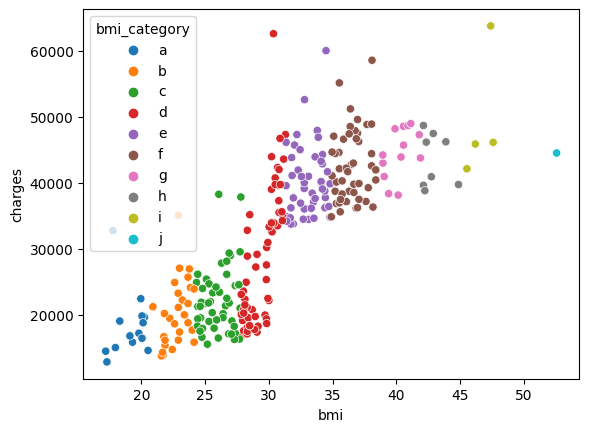

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

smoker_data = data[data['smoker'] == 'yes']

# bmi값을 10등분으로 나누기
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 산점도 그리기
sns.scatterplot(data=smoker_data, x='bmi', y='charges', hue='bmi_category')

# 분기점의 bmi 수치 찾기
charges_by_bmi = smoker_data.groupby('bmi_category')['bmi'].mean()
print(charges_by_bmi)

bmi_category
a    18.033696
b    21.809650
c    25.345595
d    29.021887
e    32.670274
f    36.359241
g    39.923148
h    43.502609
i    47.038182
j    51.755000
Name: bmi, dtype: float64


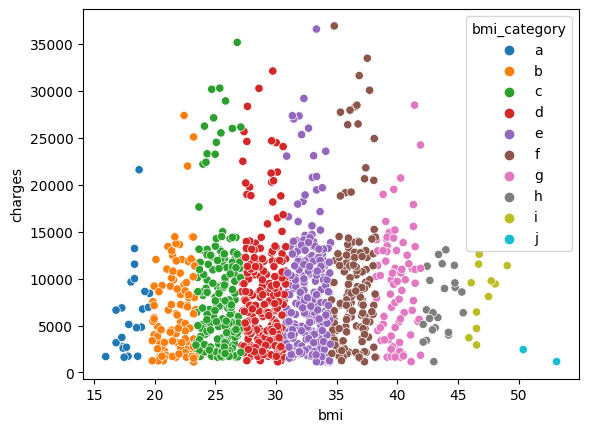

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

smoker_data = data[data['smoker'] == 'no']

# bmi값을 10등분으로 나누기
smoker_data['bmi_category'] = pd.cut(smoker_data['bmi'], bins=10, labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j'])

# 산점도 그리기
sns.scatterplot(data=smoker_data, x='bmi', y='charges', hue='bmi_category')

# 분기점의 bmi 수치 찾기
charges_by_bmi = smoker_data.groupby('bmi_category')['bmi'].mean()
print(charges_by_bmi)

In [265]:
charges_by_bmi = smoker_data.groupby('bmi_category')['charges'].mean()
print(charges_by_bmi)

bmi_category
a    6376.303639
b    6988.583444
c    8357.601620
d    8258.429288
e    8754.629297
f    9585.915863
g    9063.836678
h    7275.138038
i    8188.191527
j    1800.758950
Name: charges, dtype: float64


In [266]:
df = data[['region', 'charges']]
print(df)

         region      charges
0     southwest  16884.92400
1     southeast   1725.55230
2     southeast   4449.46200
3     northwest  21984.47061
4     northwest   3866.85520
...         ...          ...
1333  northwest  10600.54830
1334  northeast   2205.98080
1335  southeast   1629.83350
1336  southwest   2007.94500
1337  northwest  29141.36030

[1338 rows x 2 columns]


In [267]:
region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data['region'] = data['region'].map(region_mapping)


df_region_charges = data[['region', 'charges']]

data2 = df_region_charges.corr()

print(data2)


           region   charges
region   1.000000  0.006208
charges  0.006208  1.000000


In [268]:
sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)



data3 = data[['age', 'bmi', 'smoker', 'sex']].corrwith(data['children'])

print(data3)



age       0.042469
bmi       0.012759
smoker   -0.007673
sex       0.017163
dtype: float64


In [269]:
data3 = data[['age', 'children', 'smoker', 'sex']].corrwith(data['bmi'])

print(data3)

age         0.109272
children    0.012759
smoker     -0.003750
sex         0.046371
dtype: float64


In [270]:
print(data)

      age  sex     bmi  children  smoker  region      charges bmi_category
0      19    0  27.900         0       0       0  16884.92400            d
1      18    1  33.770         1       1       1   1725.55230            e
2      28    1  33.000         3       1       1   4449.46200            e
3      33    1  22.705         0       1       2  21984.47061            b
4      32    1  28.880         0       1       2   3866.85520            d
...   ...  ...     ...       ...     ...     ...          ...          ...
1333   50    1  30.970         3       1       2  10600.54830            e
1334   18    0  31.920         0       1       3   2205.98080            e
1335   18    0  36.850         0       1       1   1629.83350            f
1336   21    0  25.800         0       1       0   2007.94500            c
1337   61    0  29.070         0       0       2  29141.36030            d

[1338 rows x 8 columns]


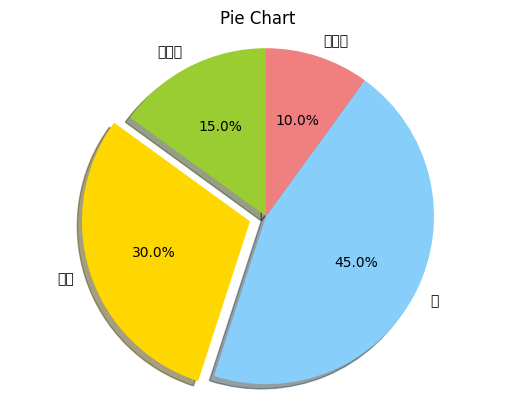

In [271]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

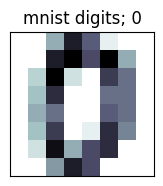

In [272]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)



plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'd'

<Figure size 1000x800 with 0 Axes>

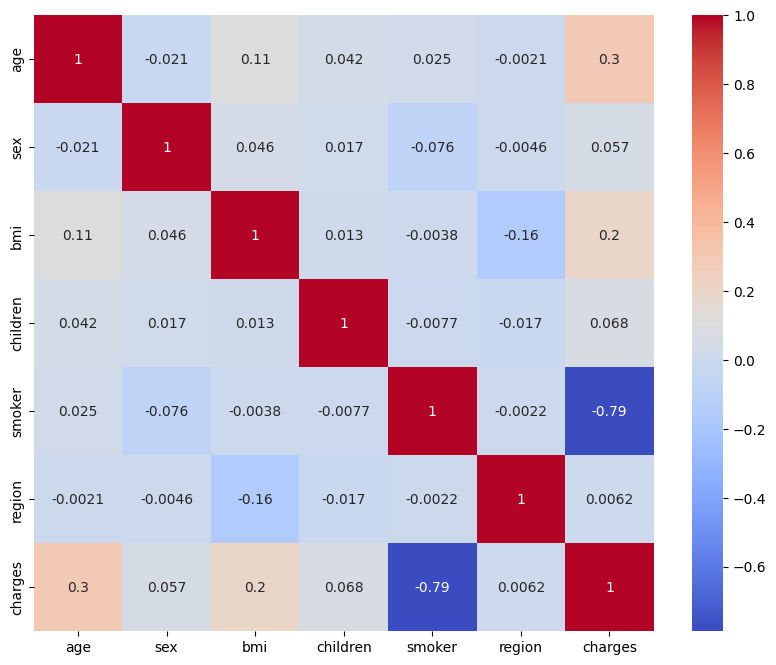

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

region_mapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data['region'] = data['region'].map(region_mapping)

sex_mapping = {'female': 0, 'male': 1}
data['sex'] = data['sex'].map(sex_mapping)

smoker_mapping = {'yes': 0, 'no': 1}
data['smoker'] = data['smoker'].map(smoker_mapping)


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()